In [1]:
                #TRAINING Step 1:Loading & Preprocesssing Images
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import cv2
# from tqdm import tqdm

# DATADIR = "Dataset" #Folder Name->Dataset

# CATEGORIES = ["goddess", "plank", "tree", "warrior2a", "downdog"]  #Inside Dataset folder there exists
                                                                 #"goddess", "plank", "tree", "warrior2a", "downdog" folder.
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category)  # create path to category
#     for img in os.listdir(path):  # iterate over each image per category
#         img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array in grayscale
#         if img_array is not None:
#             plt.imshow(img_array, cmap='gray')  # display grayscale image
#             plt.title(f'{category}')  # add title to indicate the category
#             plt.show()  # display!


#             break  # we just want one for now, so break to the next category


In [2]:
# print(img_array)


In [3]:
#print(img_array.shape)

**Below code creates a training dataset of images, each resized to 50x50 pixels and labeled with its corresponding category.**


Define the Function create_training_data:

Iterates over each category in CATEGORIES.
Constructs the path to the images for each category.
Retrieves the class number (index of the category).
Iterates over each image file in the directory.
Reads the image as a grayscale array.
Resizes the image to IMG_SIZE x IMG_SIZE.
Appends the resized image and its class number to training_data.
Handle Exceptions:

If there's an error (e.g., bad image file), it prints a message and skips that file.


In [4]:
# IMG_SIZE=50
# training_data = []

# def create_training_data():
#     for category in CATEGORIES:  

#         path = os.path.join(DATADIR,category)  # 
#         class_num = CATEGORIES.index(category)  # 

#         for img in tqdm(os.listdir(path)):  # 
#             try:
#                 img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#                 new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#                 training_data.append([new_array,class_num])  # add this to our training_data
#             except Exception as e:  # in the interest in keeping the output clean...
#                 print("Wait for a while")
#                 pass
#             #except OSError as e:
#             #    print("OSErrroBad img most likely", e, os.path.join(path,img))
#             #except Exception as e:
#             #    print("general exception", e, os.path.join(path,img))

# create_training_data()

# print(len(training_data))

## 260+381+229+361+321->1551 Total Images

In [5]:
# !pip install mediapipe
# !pip install opencv-python
import math
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [6]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

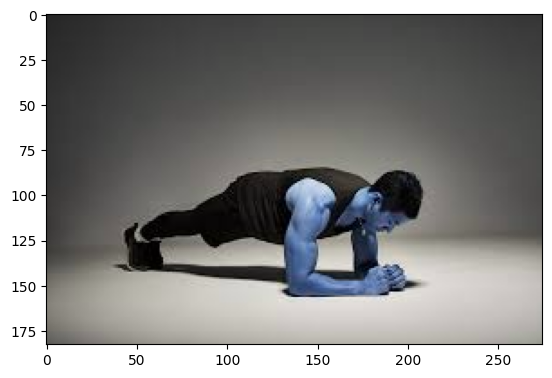

In [7]:
sample_img = cv2.imread('Validation Image/plankeg2.jpeg')
plt.imshow(sample_img)

In [8]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterates all 33 landmarks.
    for i in range(33):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.691971898
y: 0.655210733
z: -0.582648277
visibility: 0.999997377

LEFT_EYE_INNER:
x: 0.703578711
y: 0.639475703
z: -0.567981124
visibility: 0.999995112

LEFT_EYE:
x: 0.704097092
y: 0.63797158
z: -0.568423033
visibility: 0.999996185

LEFT_EYE_OUTER:
x: 0.704779
y: 0.636395
z: -0.568295479
visibility: 0.999996543

RIGHT_EYE_INNER:
x: 0.699515462
y: 0.636543691
z: -0.612042665
visibility: 0.999998212

RIGHT_EYE:
x: 0.696734071
y: 0.633554161
z: -0.612333775
visibility: 0.999998927

RIGHT_EYE_OUTER:
x: 0.693564355
y: 0.629288733
z: -0.612487197
visibility: 0.99999845

LEFT_EAR:
x: 0.686926305
y: 0.600993812
z: -0.441567957
visibility: 0.99999845

RIGHT_EAR:
x: 0.671961844
y: 0.591763854
z: -0.642465711
visibility: 0.999996543

MOUTH_LEFT:
x: 0.673632503
y: 0.654512882
z: -0.524691761
visibility: 0.999994755

MOUTH_RIGHT:
x: 0.669186294
y: 0.652285397
z: -0.585340321
visibility: 0.999993682

LEFT_SHOULDER:
x: 0.64412415
y: 0.574301243
z: -0.298819065
visibility: 0.999994755

RIGH

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:
import os
import cv2
import mediapipe as mp
import pandas as pd
from tqdm import tqdm

# # Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

mp_drawing = mp.solutions.drawing_utils

# # DataFrame to store the landmark coordinates
# columns = []
# for i in range(33):
#     columns.extend([f'x_{i}_landmark', f'y_{i}_landmark', f'z_{i}_landmark'])
# columns.append('category')  # Add column for the category
# df = pd.DataFrame(columns=columns)

# def extract_landmarks(image):
#     results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     if results.pose_landmarks:
#         landmarks = results.pose_landmarks.landmark
#         row = []
#         for landmark in landmarks:
#             row.extend([landmark.x, landmark.y, landmark.z])
#         return row
#     else:
#         return None

# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category)
#     for img in tqdm(os.listdir(path)):
#         try:
#             img_path = os.path.join(path, img)
#             image = cv2.imread(img_path)
#             landmarks = extract_landmarks(image)
#             if landmarks:
#                 landmarks.append(category)  # Add the category to the landmarks list
#                 df.loc[len(df)] = landmarks
#             else:
#                 print(f"No landmarks detected in image: {img_path}")
#         except Exception as e:
#             print(f"Error processing image {img_path}: {e}")

# # Save the DataFrame to a CSV file
# df.to_csv('pose_landmarks_with_categories.csv', index=False)
# print("DataFrame created and saved to pose_landmarks_with_categories.csv")


In [10]:
df2=pd.read_csv('pose_landmarks_with_categories.csv')
df2.columns

Index(['x_0_landmark', 'y_0_landmark', 'z_0_landmark', 'x_1_landmark',
       'y_1_landmark', 'z_1_landmark', 'x_2_landmark', 'y_2_landmark',
       'z_2_landmark', 'x_3_landmark', 'y_3_landmark', 'z_3_landmark',
       'x_4_landmark', 'y_4_landmark', 'z_4_landmark', 'x_5_landmark',
       'y_5_landmark', 'z_5_landmark', 'x_6_landmark', 'y_6_landmark',
       'z_6_landmark', 'x_7_landmark', 'y_7_landmark', 'z_7_landmark',
       'x_8_landmark', 'y_8_landmark', 'z_8_landmark', 'x_9_landmark',
       'y_9_landmark', 'z_9_landmark', 'x_10_landmark', 'y_10_landmark',
       'z_10_landmark', 'x_11_landmark', 'y_11_landmark', 'z_11_landmark',
       'x_12_landmark', 'y_12_landmark', 'z_12_landmark', 'x_13_landmark',
       'y_13_landmark', 'z_13_landmark', 'x_14_landmark', 'y_14_landmark',
       'z_14_landmark', 'x_15_landmark', 'y_15_landmark', 'z_15_landmark',
       'x_16_landmark', 'y_16_landmark', 'z_16_landmark', 'x_17_landmark',
       'y_17_landmark', 'z_17_landmark', 'x_18_landmark

In [11]:
df2.shape ##1551 rows initially

(1402, 100)

In [12]:
#SVC 
import pandas as pd
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'pose_landmarks_with_categories.csv'
data = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector classifier
clf = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(round(accuracy,3)*100,"%")

Accuracy: 0.8469750889679716
84.7 %


In [13]:
def extract_landmarks(image):
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        row = []
        for landmark in landmarks:
            row.extend([landmark.x, landmark.y, landmark.z])
        
        # Draw landmarks on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        return row, image
    else:
        return None, image

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Extract landmarks
    landmarks, landmarked_image = extract_landmarks(image)
    
    if landmarks is None:
        raise ValueError("No pose landmarks detected in the image.")
    
    return landmarks, landmarked_image

# Function to predict using the trained model
def predict_image(model, scaler, image_path):
    # Preprocess the image
    features, landmarked_image = preprocess_image(image_path)
    
    # Scale the features
    features_scaled = scaler.transform([features])
    
    # Make a prediction
    prediction = model.predict(features_scaled)
    
    # Display the image with landmarks
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(landmarked_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Category: {prediction[0]}')
    plt.axis('off')
    plt.show()
    
    return prediction

In [14]:
import pickle
loaded_model=pickle.load(open("Project_Model",'rb'))
loaded_scaler=pickle.load(open("Project_Scaler",'rb'))

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


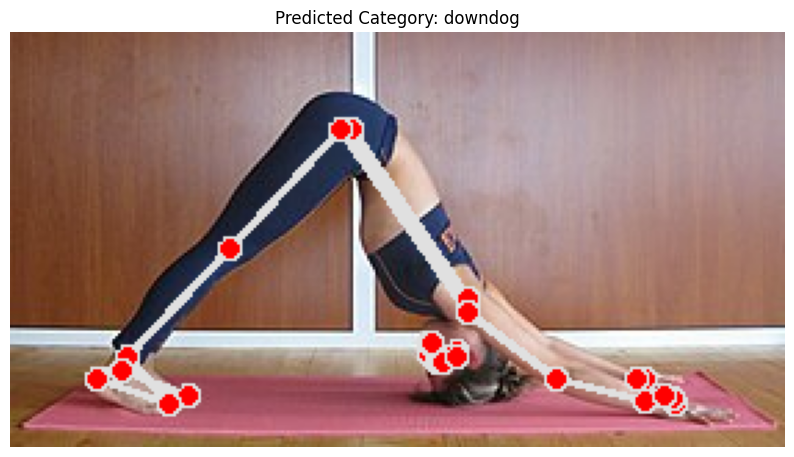

Predicted Category: downdog


In [15]:
#print(predict_image(clf, scaler,"Downward-Facing-Dog-1.JPG" ))

# # Example usage
# image_path = "Validation Image/warriorposeeg1.jpeg"
# predicted_category = predict_image(clf, scaler, image_path)
# print(f'Predicted Category: {predicted_category[0]}')

image_path = "Validation Image/Downward-Facing-Dog-1.JPG"
predicted_category = predict_image(loaded_model, loaded_scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')



C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


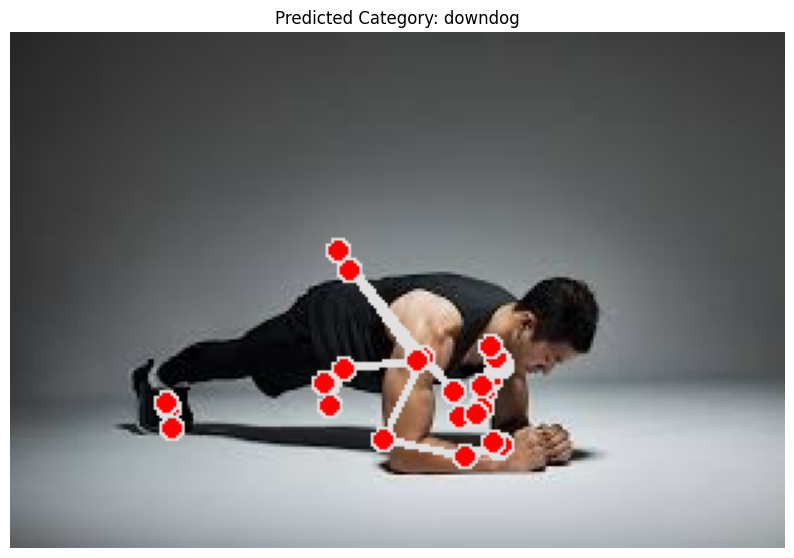

Predicted Category: downdog


In [16]:
# Example usage
image_path = "Validation Image/plankeg2.jpeg"
predicted_category = predict_image(loaded_model, loaded_scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


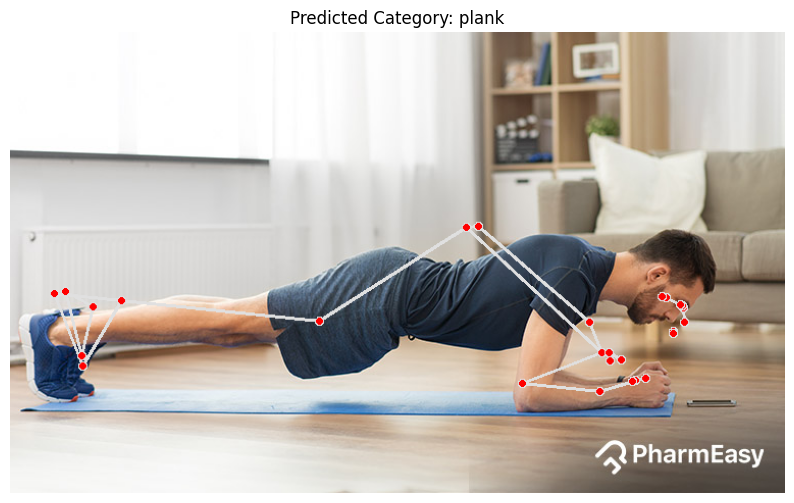

Predicted Category: plank


In [17]:
# Example usage
image_path = "Validation Image/plankeg3.jpg"
predicted_category = predict_image(loaded_model, loaded_scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


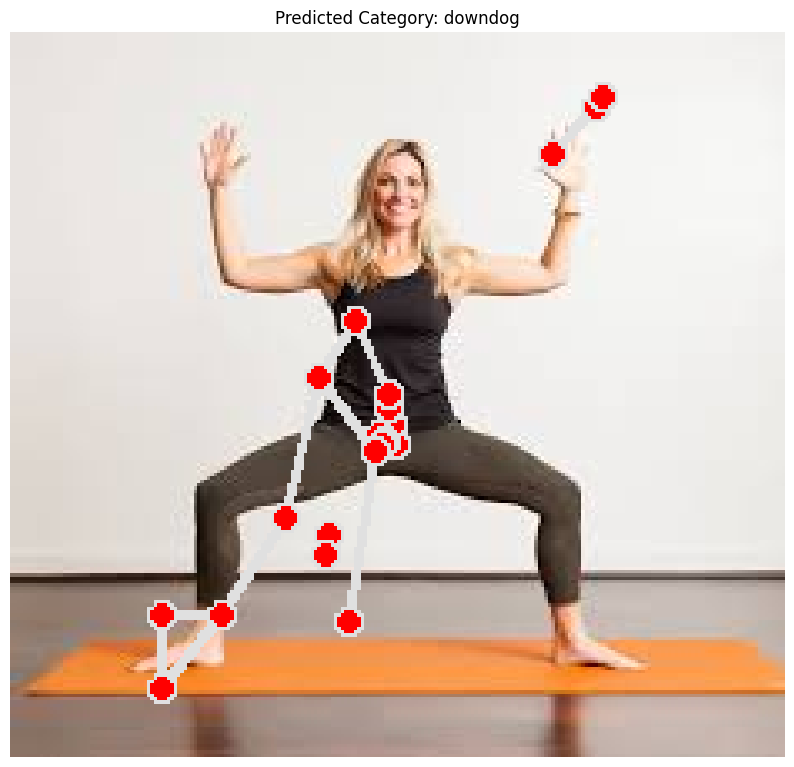

Predicted Category: downdog


In [18]:
image_path = "Validation Image/godesseg1.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


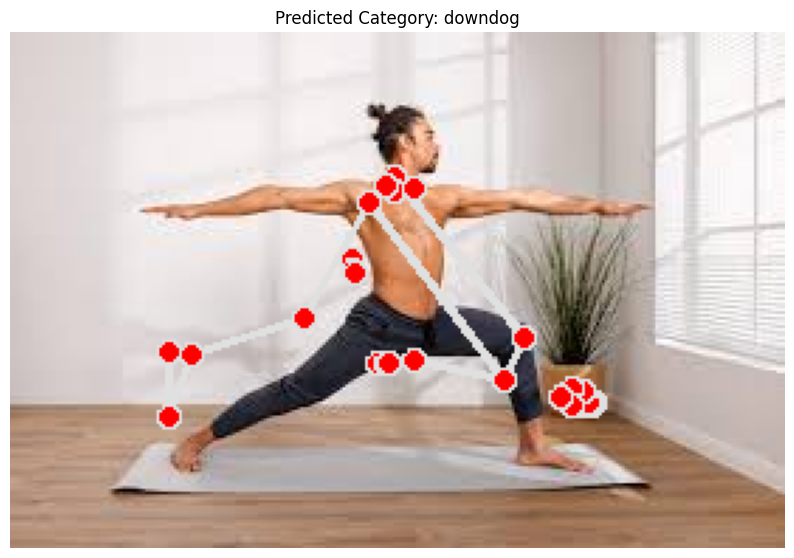

Predicted Category: downdog


In [19]:
image_path = "Validation Image/warriorposeeg1.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


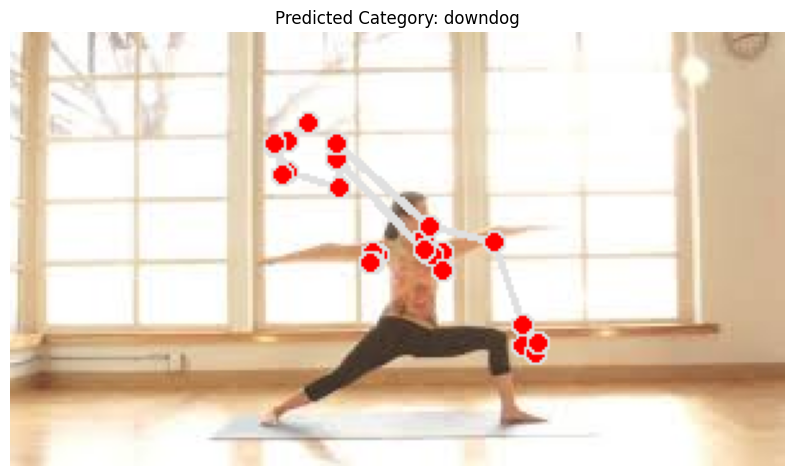

Predicted Category: downdog


In [20]:
image_path = "Validation Image/warriorpose2.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


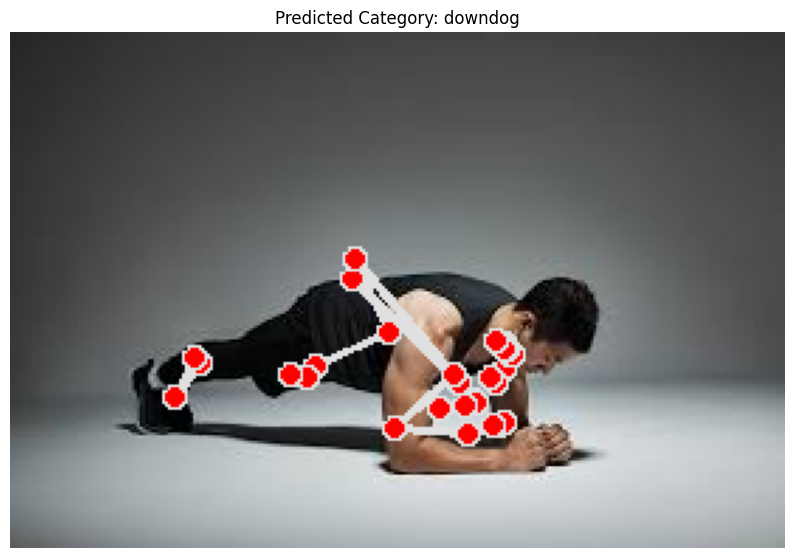

Predicted Category: downdog


In [21]:
image_path = "Validation Image/plankeg2.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

# Saving the Model


In [22]:
!pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-312\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-312\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-312\pickle5
  creating build\lib.win-amd64-cpython-312\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-312\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-312\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-312\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-312\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Mi

In [23]:
 import pickle
# pickle.dump(clf,open("Project_Model",'wb'))

In [24]:
#pickle.dump(scaler,open("Project_Scaler",'wb'))

# Loding model

In [25]:
loaded_model=pickle.load(open("Project_Model",'rb'))
loaded_scaler=pickle.load(open("Project_Scaler",'rb'))

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


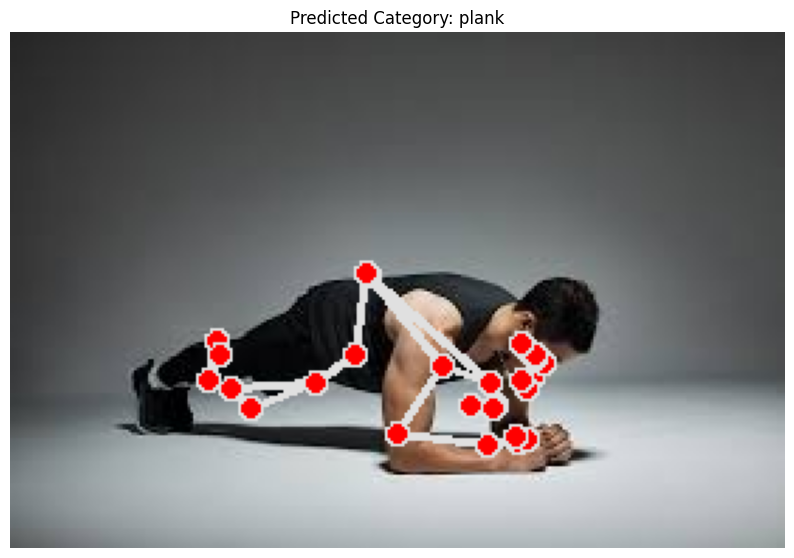

Predicted Category: plank


In [26]:
image_path = "Validation Image/plankeg2.jpeg"
predicted_category = predict_image(loaded_model,loaded_scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

In [27]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Function for real-time pose estimation and classification
def real_time_pose_estimation(model, scaler):
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        landmarks, landmarked_image = extract_landmarks(frame)
        
        if landmarks:
            features_scaled = scaler.transform([landmarks])
            prediction = model.predict(features_scaled)
            cv2.putText(landmarked_image, f'Predicted Category: {prediction[0]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.imshow('Pose Estimation', landmarked_image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Call the function to start real-time pose estimation
real_time_pose_estimation(loaded_model, loaded_scaler)

C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: Us